In [1]:
# Nmae : Himanshu Agarwal , Net id: HXA180027
#q2 Advertising dataset
#mporting libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 

In [51]:
#import data using the pandas libraries.
advertising_dataset = pd.read_csv("advertising.csv")
advertising_dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


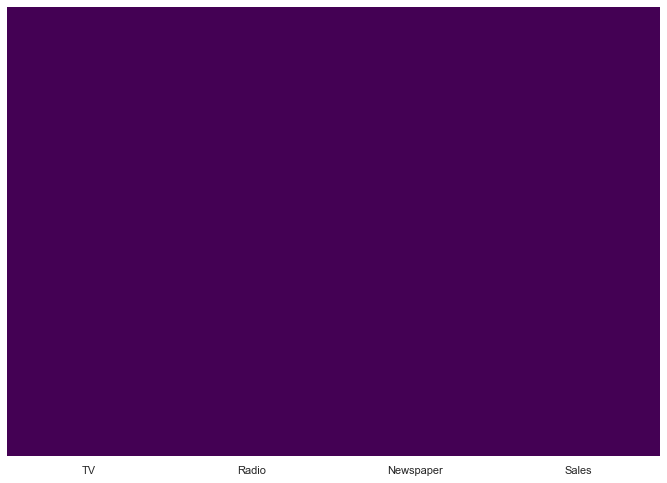

In [52]:
#Heatmap to check the missig values
sns.heatmap(advertising_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [53]:
#This shows that no any values is missing in the given dataset.

In [ ]:
#Now, we need to perform Exploratory Data Analysis. It is a very important step before training the model. 
#In this section, we will use some visualizations to understand the relationship of the target variable with other features.

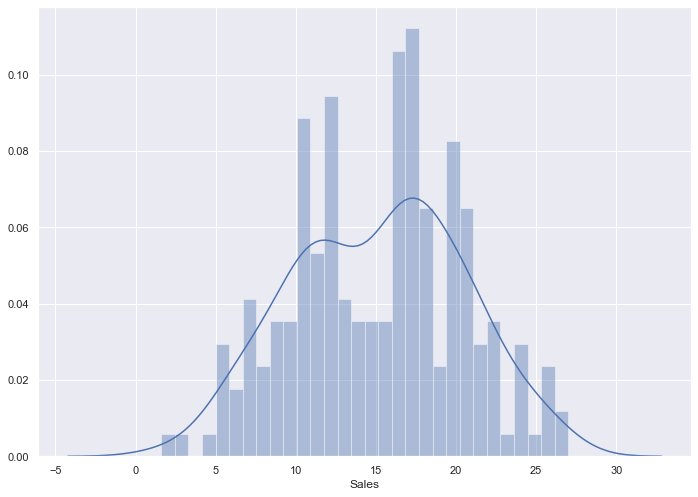

In [39]:
#distribution of the target variable Sales, using the distplot function from the seaborn library
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(advertising_dataset['Sales'], bins=30)
plt.show()

In [ ]:
 #This shows that values of Sales are distributed normally with few outlier.

In [ ]:
# create a correlation matrix that measures the linear relationships between the variables.
#The correlation matrix can be formed by using the corr function from the pandas dataframe library. 
#We will use the heatmap function from the seaborn library to plot the correlation matrix

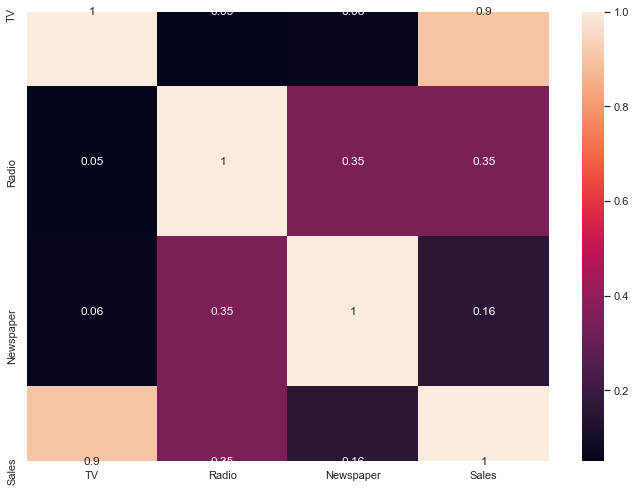

In [40]:
correlation_matrix = advertising_dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [54]:
'''
Feature selection using correlation matrix:

To fit a linear regression model, we select those features which have a high correlation with our target variable Sales. 
By looking at the correlation matrix we can see that TV has a strong positive correlation with Sales (0.9) 
While correlation of Newspaper with Sales is quite low i.e 0.16.

'''

'\nFeature selection using correlation matrix:\n\nTo fit a linear regression model, we select those features which have a high correlation with our target variable Sales. \nBy looking at the correlation matrix we can see that TV has a strong positive correlation with Sales (0.9) \n\n'

In [ ]:
#Using a scatter plot let’s see how these feature vary with Sales.

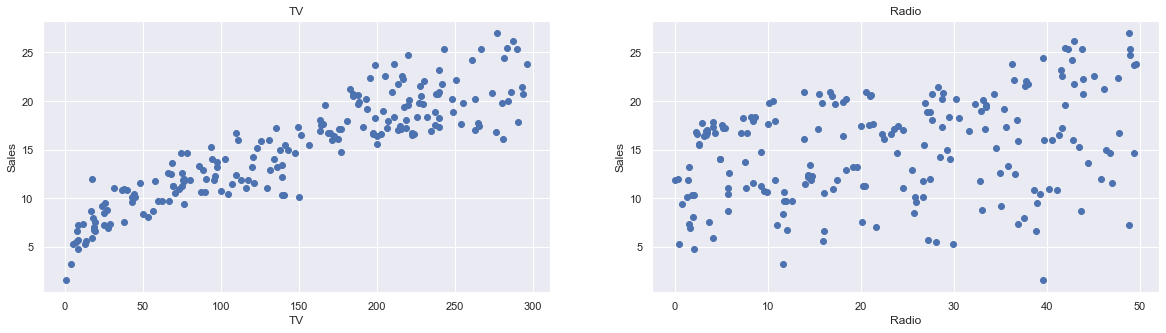

In [61]:
plt.figure(figsize=(20, 5))

features = ['TV','Radio']
target = advertising_dataset['Sales']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = advertising_dataset[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Sales')

In [62]:
#The Sales increase as the value of TV prices increases linearly. There are few outliers and the data seems to be capped at 25.

In [63]:
#We concatenate on the TV and Radio columns using np.c_ provided by the numpy library.
X = pd.DataFrame(np.c_[advertising_dataset['TV'],advertising_dataset['Radio']], columns = ['TV','Radio'])
Y = advertising_dataset['Sales']

In [64]:
from sklearn.model_selection import train_test_split #Library to split the data in training and test sets.
#train the model with 70% of the samples and test with the remaining 30%. 
#We do this to assess the model’s performance on unseen data. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=5)
#Dimentions of the training and test data sets 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(140, 2)
(60, 2)
(140,)
(60,)


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#using scikit-learn’s LinearRegression to train our model on the training set.
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#evaluating our model using RMSE and R2-score.

In [66]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)  #Making prediction on training set
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict))) #Calculating Root mean sqaure error on training set prediction.
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test) #Making prediction on test set
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict))) #Calculating Root mean sqaure error on test set prediction.
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 1.7548632129988315
R2 score is 0.8951069952445573


The model performance for testing set
--------------------------------------
RMSE is 1.354904989706292
R2 score is 0.9229706950384353
